## Regresión logística multinomial -Iris dataset

Los pasos para construir una regresión logística incluyen:

* Importar los paquetes, clases y funciones.
* Cargar los datos.
* Análisis exploratorio de datos (AED/EDA).
* Transformar los datos si es necesario.
* Ajustar el modelo de clasificación.
* Evaluar el modelo de rendimiento.

## Importar los paquetes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Cargar el conjunto de datos

Importa el conjunto de datos de iris. Nos ayudarán a construir un modelo de regresión logística para mostrar los tipos de flores como lo son Setosa, Versicolor y Virginica codificadas como 0, 1 y 2 respectivamente.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de Iris
iris = load_iris()

# Crear un DataFrame de pandas para las características
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la columna de etiquetas al DataFrame
iris_df['target'] = iris.target

# Imprimir las primeras filas del DataFrame
print(iris_df.head())

df= iris_df
df.head()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

Analizar primero los datos es clave para comprender sus características. Empezaremos por comprobar los valores que faltan.

In [4]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [5]:
df.shape

(150, 5)

Escogeremos una especie (target) para realizar una variable dummie y que el modelo evalué cuales son las de esta especie, esta será "Setosa" con un target de 0.
Evaluaremos la cantidad de esta especie.

C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\237410705.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


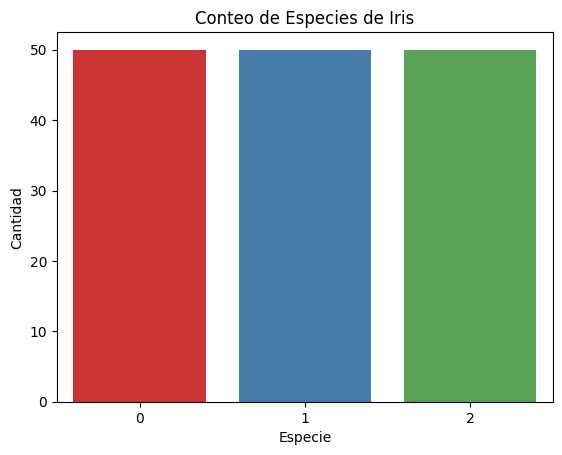

In [6]:
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Conteo de Especies de Iris')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()

Se observa como hay 50 de cada especie. 

<Axes: xlabel='petal length (cm)', ylabel='count'>

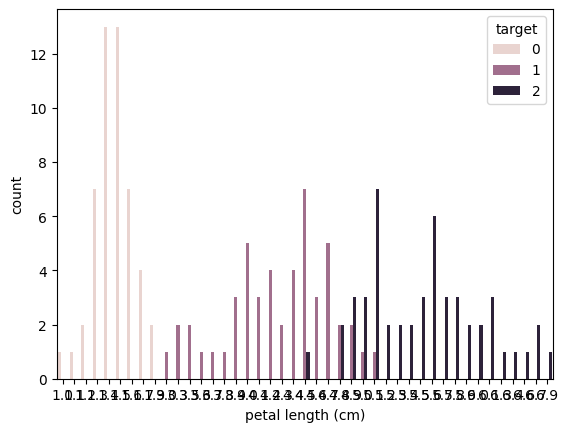

In [7]:
sns.countplot(x='petal length (cm)', hue='target', data=df)

Se puede observar como por ejemplo, en la variable de "petal length" hay una gran diferencia entre tipo de flor.

 También podemos comprobar la distribución de las longitudes y ancho en el conjunto de datos:

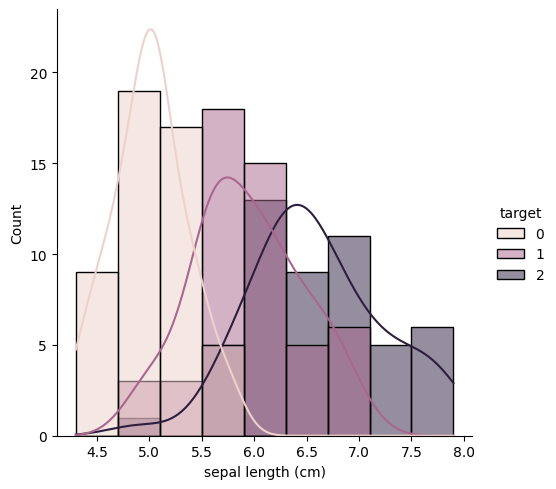

In [8]:
sns.displot(x='sepal length (cm)', data=df, color='purple', kde=True, hue= "target")


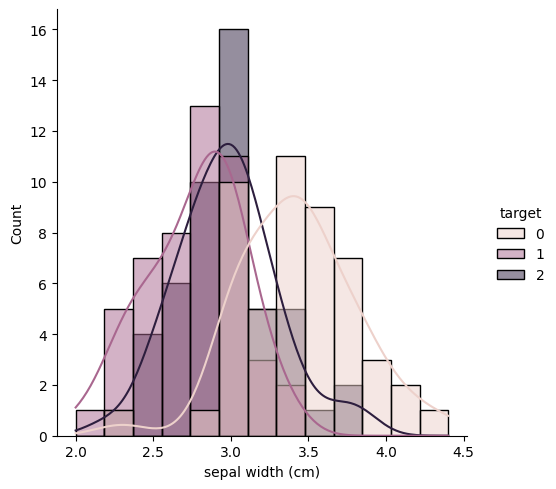

In [9]:
sns.displot(x='sepal width (cm)', data=df, color='purple', kde=True, hue= "target")

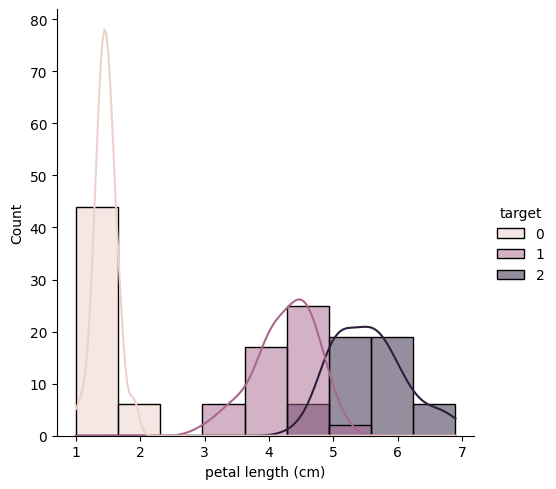

In [10]:
sns.displot(x='petal length (cm)', data=df, color='purple', hue= "target",kde=True)

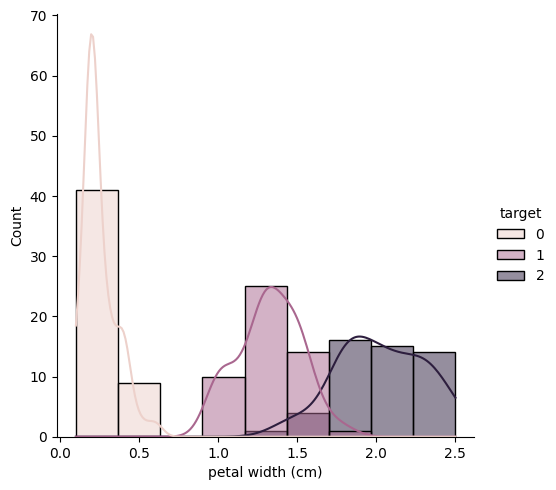

In [11]:
sns.displot(x='petal width (cm)', data=df, color='purple',hue= "target", kde=True)

Con estas gráficas se observan como están distribuidos los datos, en las variables de "sepal length" y "sepal width" se observa un comportamiento parecido a la de una distribución normal, observando así que los tipos de flores no están separados o no muestran una segmentación marcada en este tipo de característica.

Por otro lado, las características de los petalos, no se distribuyen normalmente, y se observa una segmentación más marcada, teniendo al primer target (Setosa) con las menores medidas de petalo, y al target perteneciente a (Virginica=2), con las mayores medidas. 

También se observa un espacio entre la distribución.

C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\178419386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='target', y='petal length (cm)', data=iris_df, kind='swarm', palette='Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22940\178419386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='target', y='petal width (cm)', data=iris_df, kind='swarm', palette='Set1')
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


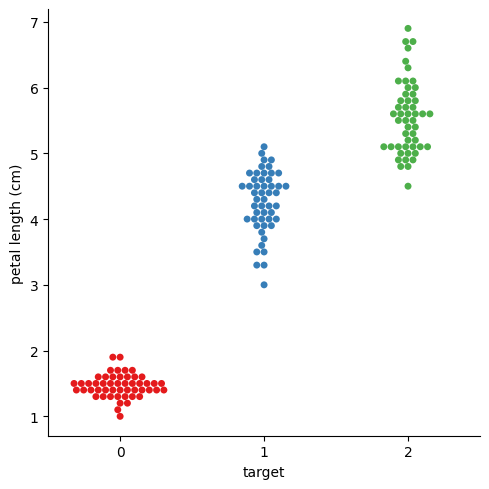

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


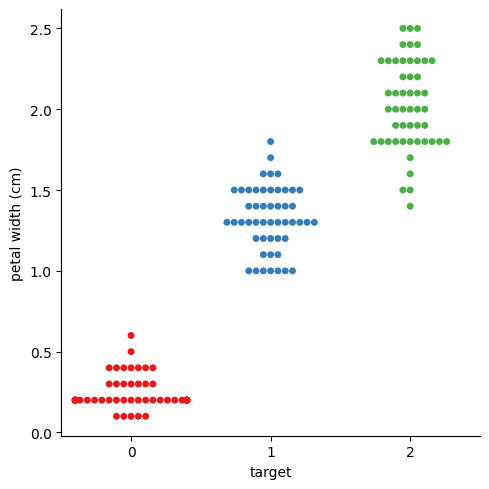

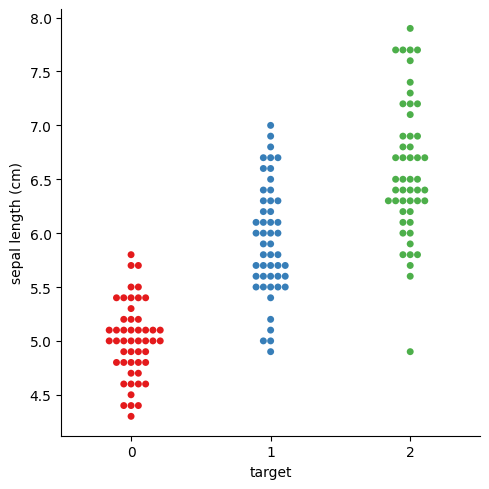

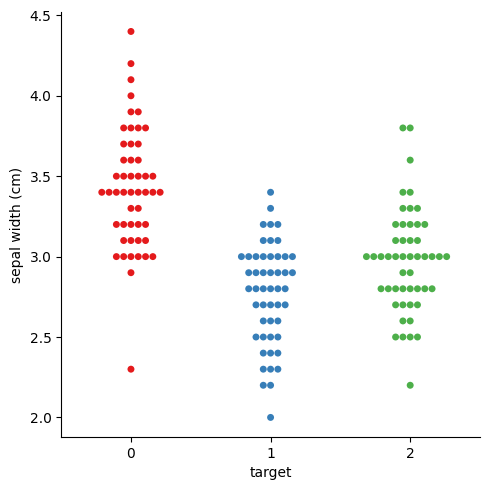

In [12]:
sns.catplot(x='target', y='petal length (cm)', data=iris_df, kind='swarm', palette='Set1')
sns.catplot(x='target', y='petal width (cm)', data=iris_df, kind='swarm', palette='Set1')
sns.catplot(x='target', y='sepal length (cm)', data=iris_df, kind='swarm', palette='Set1')
sns.catplot(x='target', y='sepal width (cm)', data=iris_df, kind='swarm', palette='Set1')

# Mostrar todas las gráficas
plt.show()

Se observa de nuevo en estas gráficas, y se determina la conclusión que los targets están mejor segmentados por las características de los petalos, se entiende como el target 0  tiene sepal width mas alto pero en las otras caracteristicas es el mas bajo,por otro lado el target 1  tiene valores medio o normales en todas las aracteristica exceptuando el sepal width donde es el mas  bajo y por ultimo el target 2 el cual es el mas alto en todas las caracteristicas y con un valor medio en el sepal width.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## División de los datos en variables independientes(X) y dependientes(y)

Divida los datos en variables independientes y dependientes.

In [14]:
X = df.iloc[:,[0,1,2,3]] # sepal length, sepal width, petal length, petal width
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df.iloc[:, 4] # Target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

## Feature scaling

El escalado de características es un método utilizado para normalizar el rango de las variables independientes. El método permite que las variables independientes estén en el mismo rango.

Cuando se trabaja con grandes conjuntos de datos, el escalado desempeña un papel importante en la mejora del rendimiento del modelo.

En los datos, importaremos el StandardScaler del módulo de preprocesamiento de Scikit-learn y lo utilizaremos para transformar los datos. Por ejemplo, hay una gran diferencia entre los valores de la variable Edad y los de SalarioEstimado.


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba mediante la función train_test_split.


In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


## Ajuste/fit del modelo de regresión logística y predicción de los resultados de las pruebas
Ahora que el conjunto de datos está bien preparado, podemos entrenar el modelo importando la clase LogisticRegression del módulo linear_model de Scikit-learn.

El entrenamiento se realiza llamando al método fit y pasándole los datos de entrenamiento es importante recalcar que el clasificador usa de manera automatica un valor de 5.

In [18]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

El modelo ya está entrenado en el conjunto de entrenamiento. Vamos a realizar la predicción en el conjunto de prueba utilizando el método predecir.

In [19]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

Vamos a crear un Pandas DataFrame y comparar los valores previstos y reales.

In [20]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
14,0,0
98,1,1
75,1,1
16,0,0
131,2,2
56,1,1
141,2,2
44,0,0
29,0,0
120,2,2


Los atributos coef_ e intercept_ proporcionan el coeficiente y el intercepto del modelo.

In [21]:
classifier.coef_
# array([[2.36839196, 1.42929561, 0.20973787]])


array([[-0.99587855,  0.94871656, -1.69604083, -1.58796169],
       [ 0.63065579, -0.48928005, -0.26633838, -0.69534198],
       [ 0.36522276, -0.45943651,  1.96237921,  2.28330367]])

In [22]:
classifier.intercept_ 
# array([-1.1352347])

array([-0.37321496,  1.64054928, -1.26733432])

## Evaluando el modelo
Hay varias formas de comprobar el rendimiento del modelo.

Uso de predict_proba
* Devuelve la matriz de probabilidades de que la salida predicha sea igual a cero o a uno.

In [23]:
print(classifier.predict_proba(X))


[[9.82133405e-01 1.78653144e-02 1.28016007e-06]
 [9.39678476e-01 6.03170708e-02 4.45360405e-06]
 [9.79832804e-01 2.01657776e-02 1.41832217e-06]
 [9.73060230e-01 2.69372667e-02 2.50337429e-06]
 [9.89385861e-01 1.06133483e-02 7.90783033e-07]
 [9.86084142e-01 1.39128774e-02 2.98060873e-06]
 [9.89477292e-01 1.05214066e-02 1.30155728e-06]
 [9.77937870e-01 2.20602900e-02 1.84019186e-06]
 [9.67711811e-01 3.22854085e-02 2.78056396e-06]
 [9.57430889e-01 4.25666843e-02 2.42693519e-06]
 [9.81948743e-01 1.80499051e-02 1.35147008e-06]
 [9.83769075e-01 1.62292864e-02 1.63870545e-06]
 [9.55231642e-01 4.47660517e-02 2.30625479e-06]
 [9.86475862e-01 1.35235787e-02 5.59560072e-07]
 [9.88397522e-01 1.16019449e-02 5.33211778e-07]
 [9.95877447e-01 4.12190895e-03 6.44128868e-07]
 [9.89907713e-01 1.00909849e-02 1.30246270e-06]
 [9.79949806e-01 2.00480677e-02 2.12621296e-06]
 [9.69410179e-01 3.05858282e-02 3.99246206e-06]
 [9.91845938e-01 8.15305996e-03 1.00188900e-06]
 [9.44836816e-01 5.51579714e-02 5.212154

En la matriz, cada fila representa una única observación. La primera columna es la probabilidad de que la flor no sea setosa(1-p(x)), y la segunda columna es la probabilidad de que la flor sea setosa(p(x)).

Hay varias formas de comprobar el rendimiento del modelo.
* Uso de la matriz de confusión
Desde el módulo de métricas de Scikit-learn, importamos confusion_matrix. La matriz de confusión es el número de predicciones correctas e incorrectas por columnas, mostrando los siguientes valores:

- Verdaderos negativos(TN) en la posición superior izquierda.
- Falsos negativos (FN) en la posición inferior izquierda.
- Falsos positivos (FP) en la parte superior derecha.
- Verdaderos positivos (TP) en la parte inferior derecha.

In [24]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Añadir nombres de clases para una mejor nterpretación
classes_names = ['Setosa','Versicolor','Virginica']

#Crear matriz de confusión
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
cm

,Setosa,Versicolor,Virginica
Setosa,14,0,0
Versicolor,0,17,1
Virginica,0,1,12


En este punto se entiende como el target de versicolor y virginica en una asignacion son dificiles de diferenciar pero en las demas asignaciones el modelo predice de manera solida las categorias a las que pertenecen los datos.

Text(0.5, 23.52222222222222, 'Predicted label')

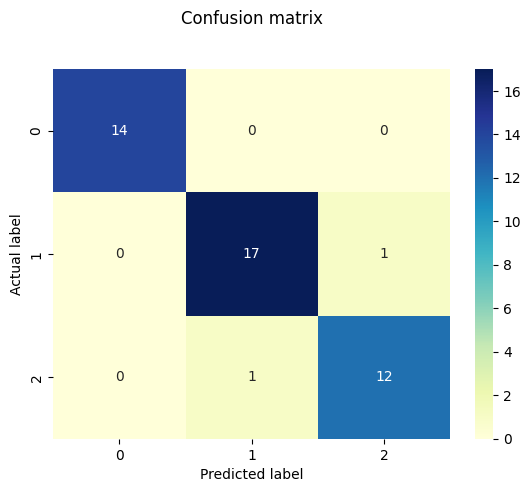

In [26]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

La salida de la matriz de confusión es una matriz 3*3 ya que el modelo es una clasificación binaria. Vamos a visualizarlo mejor utilizando un mapa de calor y explicarlo.

Para Setosa:
- 14 predicciones TP
- 31 predicciones TN
- 0 predicciones FP
- 0 predicciones FN

Para Versicolor: 
- 17 predicciones TP 
- 26 predicciones TN
- 1 predicciones FP
- 1 predicciones FN

Para Virginica:
- 12 predicciones TP
- 31 predicciones TN
- 1 predicciones FP
- 1 predicciones FN

accuracy = (TN + TP)/ (TN + TP + FP + FN)


In [27]:
'''
Accuracy_Setosa = (31 + 14)/(31 + 14 + 0 + 0)
Accuracy_Setosa

Accuracy_Versicolor = (26 + 11)/(26 + 17 + 1 + 1)
Accuracy_Versicolor

Accuracy_Virginica = (31 + 12)/(31 + 12 + 1 + 1)
Accuracy_Virginica
'''

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


0.9555555555555556

In [28]:
Accuracy_Setosa = (31 + 14)/(31 + 14 + 0 + 0)
Accuracy_Setosa

1.0

In [29]:
Accuracy_Versicolor = (26 + 11)/(26 + 17 + 1 + 1)
Accuracy_Versicolor

0.8222222222222222

In [30]:
Accuracy_Virginica = (31 + 12)/(31 + 12 + 1 + 1)
Accuracy_Virginica

0.9555555555555556

## Metricas de la matriz de confusión

El informe_de_clasificación ofrece un informe más completo del rendimiento del modelo.



In [31]:
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      0.94      0.94        18
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Conclusiones

Se puede observar que la clasificación de "Setosa", en el modelo tiene una precisión del 100%, es decir, para el 30% de los datos que se usaron, tiene unas medidas de desempeño muy altas. 

Se tomaron 3 clasificaciones debido al KNN realizado anteriormente. 

Para las demás clasificaciones solo se equivocó en 1 FP y en 1 FN para cada una de ellas. Es decir, aunque no tenga la precisión del 100%, sus medidas de desempeño son altas, lo que significa que este modelo de clasificación es muy confiable. Además se resalta que las variables que más tienen incidencia en el momento de clasificarlas son las características de los petalos. 


## Bibliografía
Pesca, M. (2024). Clase de regresión logística - Toma 2. GitHub. https://github.com/ingmpesca/td2-2024